Info.Need 1:
  - Média P@5: 0.7000
  - Média MAP: 0.7662

Info.Need 2:
  - Média P@5: 0.9000
  - Média MAP: 0.8946

Info.Need 3:
  - Média P@5: 0.8000
  - Média MAP: 0.8113

Info.Need 4:
  - Média P@5: 0.8000
  - Média MAP: 0.8059

Info.Need 5:
  - Média P@5: 0.7000
  - Média MAP: 0.7288

Média Geral:
  - Média P@5: 0.7800
  - Média MAP: 0.8014



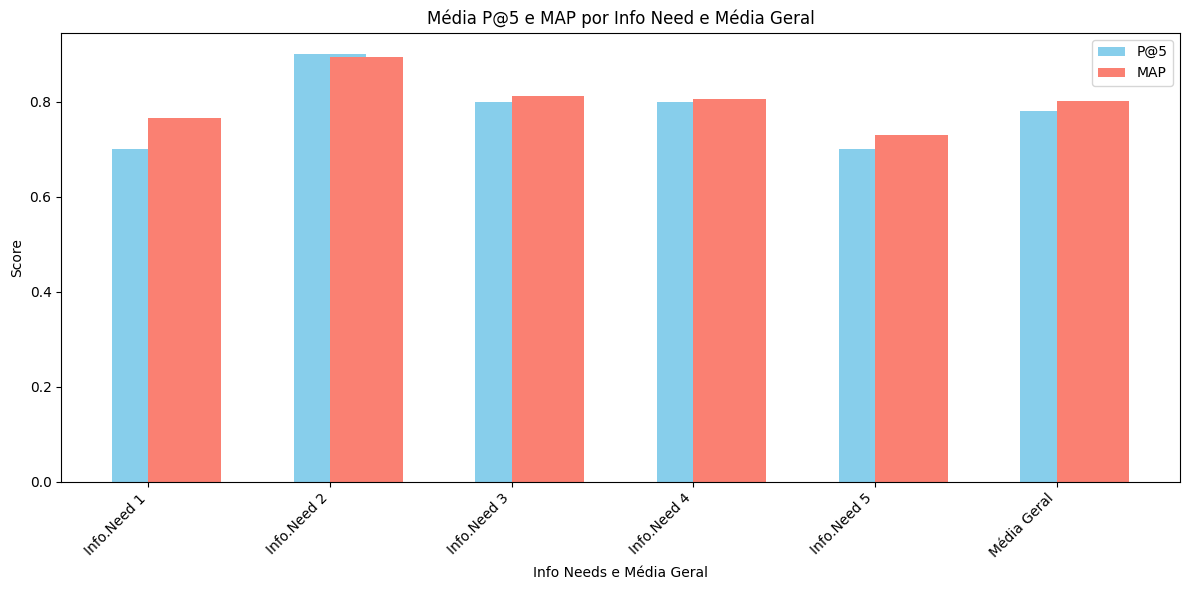

In [22]:
import matplotlib.pyplot as plt

# Função para transformar a lista de documentos em uma lista de binários (1 = relevante, 0 = não relevante)
def marcar_relevancia(documentos_retorno, documentos_nao_relevantes):
    return [0 if doc in documentos_nao_relevantes else 1 for doc in documentos_retorno]

# Função para calcular a precisão nos primeiros k documentos (P@k)
def precision_at_k(relevancia_binaria, k):
    top_k = relevancia_binaria[:k]
    return sum(top_k) / k if k > 0 else 0

# Função para calcular a Average Precision (AP)
def average_precision(relevancia_binaria):
    precisions = []
    total_relevantes = sum(relevancia_binaria)
    if total_relevantes == 0:
        return 0  # Se não houver documentos relevantes, AP = 0
    for i in range(len(relevancia_binaria)):
        if relevancia_binaria[i] == 1:
            precisions.append(precision_at_k(relevancia_binaria, i + 1))
    return sum(precisions) / total_relevantes if total_relevantes > 0 else 0

# Função principal para calcular as métricas e visualizar os resultados
def calcular_metricas_globais(sistemas):
    metricas_por_sistema = {}

    for i, (resultados_sistema, irrelevant_docs) in enumerate(sistemas, start=1):
        metricas_sistema = []
        for query, docs_nao_relevantes in irrelevant_docs.items():
            documentos_retorno = resultados_sistema.get(query, [])
            relevancia_binaria = marcar_relevancia(documentos_retorno, docs_nao_relevantes)
            p_at_5 = precision_at_k(relevancia_binaria, min(5, len(relevancia_binaria)))
            map_score = average_precision(relevancia_binaria)
            metricas_sistema.append({'P@5': p_at_5, 'MAP': map_score})
        
        media_p_at_5 = sum(m['P@5'] for m in metricas_sistema) / len(metricas_sistema)
        media_map = sum(m['MAP'] for m in metricas_sistema) / len(metricas_sistema)
        metricas_por_sistema[f'Info.Need {i}'] = {'P@5': media_p_at_5, 'MAP': media_map}

    # Cálculo da média geral
    media_geral_p_at_5 = sum(s['P@5'] for s in metricas_por_sistema.values()) / len(metricas_por_sistema)
    media_geral_map = sum(s['MAP'] for s in metricas_por_sistema.values()) / len(metricas_por_sistema)

    metricas_por_sistema['Média Geral'] = {'P@5': media_geral_p_at_5, 'MAP': media_geral_map}

    # Exibição dos resultados
    for sistema, metricas in metricas_por_sistema.items():
        print(f"{sistema}:")
        print(f"  - Média P@5: {metricas['P@5']:.4f}")
        print(f"  - Média MAP: {metricas['MAP']:.4f}\n")
    
    # Visualização do gráfico de métricas
    sistemas = list(metricas_por_sistema.keys())
    p_at_5_values = [metricas_por_sistema[s]['P@5'] for s in sistemas]
    map_values = [metricas_por_sistema[s]['MAP'] for s in sistemas]

    x = range(len(sistemas))
    plt.figure(figsize=(12, 6))
    plt.bar(x, p_at_5_values, width=0.4, label='P@5', align='center', color='skyblue')
    plt.bar(x, map_values, width=0.4, label='MAP', align='edge', color='salmon')
    plt.xticks(x, sistemas, rotation=45, ha="right")
    plt.xlabel('Info Needs e Média Geral')
    plt.ylabel('Score')
    plt.title('Média P@5 e MAP por Info Need e Média Geral')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ============================
# Entradas do sistema
# ============================

# Simulação dos documentos retornados pelo sistema de busca para cada user query
resultados_sistema1 = {
    'KW': ['MED-1991', 'MED-1489', 'MED-1250', 'MED-1869', 'MED-4258', 'MED-1874', 'MED-2432'],
    'VS' : ['MED-1997', 'MED-1489', 'MED-4831', 'MED-1319', 'MED-2951', 'MED-4689', 'MED-5231']
}
irrelevant_docs1 = {
    'KW': ['MED-1250','MED-1869','MED-1991','MED-2335'],
    'VS': ['MED-3242']
}

resultados_sistema2 = {
    'KW': ['MED-4084', 'MED-933', 'MED-4850', 'MED-4849', 'MED-4843', 'MED-3759', 'MED-1127'],
    'VS': ['MED-4844', 'MED-4845', 'MED-4856', 'MED-2803', 'MED-4851', 'MED-4847', 'MED-4631']
}
irrelevant_docs2 = {
    'KW':['MED-3583','MED-2191','MED-1664','MED-2810','MED-3271','MED-3517','MED-5232','MED-4138'],
    'VS':['MED-2803','MED-2802','MED-4855']
}
resultados_sistema3 = {
    'KW':['MED-4315', 'MED-4496', 'MED-2301', 'MED-1890', 'MED-1885', 'MED-1552', 'MED-1966'],
    'VS':['MED-1885', 'MED-3197', 'MED-5330', 'MED-1258', 'MED-1968', 'MED-1884', 'MED-1890']
}
irrelevant_docs3 = {
    'KW': ['MED-1129','MED-2301','MED-1366','MED-4315'],
    'VS': ['MED-1554']
}

resultados_sistema4 = {
    'KW': ['MED-3759', 'MED-4531', 'MED-2298', 'MED-3113', 'MED-1664', 'MED-3583', 'MED-2188'],
    'VS': ['MED-2322', 'MED-3758', 'MED-4840', 'MED-4372', 'MED-2572', 'MED-4371', 'MED-4366']
}
irrelevant_docs4 = {
    'KW': ['MED-1664','MED-2298','MED-2700','MED-1097','MED-3625','MED-3271','MED-5343','MED-1667','MED-2191','MED-2188','MED-3583','MED-874','MED-2328','MED-3842','MED-5232','MED-3517','MED-3756','MED-1037','MED-3271'],
    'VS': ['MED-3760','MED-3756']
}

resultados_sistema5 = {
    'KW': ['MED-2091', 'MED-3975', 'MED-1871', 'MED-3988', 'MED-4573', 'MED-2051', 'MED-3990'],
    'VS': ['MED-4570', 'MED-3990', 'MED-3987', 'MED-4574', 'MED-714', 'MED-2762', 'MED-3988']
}

irrelevant_docs5 = {
    'KW': ['MED-2091','MED-3975','MED-1871','MED-2051','MED-922','MED-5131','MED-3487','MED-4683','MED-1160','MED-2301','MED-2726','MED-921','MED-2946','MED-5129','MED-4724','MED-921','MED-4929','MED-3464'],
    'VS': []
}

sistemas = [
    (resultados_sistema1, irrelevant_docs1),
    (resultados_sistema2, irrelevant_docs2),
    (resultados_sistema3, irrelevant_docs3),
    (resultados_sistema4, irrelevant_docs4),
    (resultados_sistema5, irrelevant_docs5)
]

# Chamada da função principal
calcular_metricas_globais(sistemas)
